In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Make tables easier to read
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 140)

CSV_PATH = "data.csv"


In [2]:
N_ROWS = 1000000  #total rows 7 828 021

In [3]:
df = pd.read_csv(CSV_PATH, nrows=N_ROWS)
df.head()

C:\Users\gerar\AppData\Local\Temp\ipykernel_17800\4186567724.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(CSV_PATH, nrows=N_ROWS)


,any,mes,codi de la regió sanitària,regió sanitària,grup d'edat,sexe,codi del grup ATC nivell 1,grup ATC nivell 1,codi del grup ATC nivell 2,grup ATC nivell 2,codi del grup ATC nivell 3,grup ATC nivell 3,codi del grup ATC nivell 4,grup ATC nivell 4,nombre de receptes,nombre d'envasos,import íntegre,import aportació CatSalut
0,2025,9,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A01,PREPARADOS ESTOMATOLOGICOS,A01A,PREPARADOS ESTOMATOLOGICOS,A01AB,Antiinfecciosos y antisepticos para el tratami...,3.0,3.0,"8,49","7,36"
1,2025,9,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A02,AGENTES PARA EL TRATAMIENTO DE ALTERACIONES CA...,A02B,AGENTES CONTRA LA ULCERA PEPTICA Y EL REFLUJO ...,A02BC,Inhibidores de la bomba de protones,1.0,1.0,"17,75","10,65"
2,2025,9,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A07,"ANTIDIARREICOS, AGENTES ANTIINFLAMATORIOS/ANTI...",A07A,ANTIINFECCIOSOS INTESTINALES,A07AA,Antibioticos,17.0,17.0,"79,56","53,84"
3,2025,9,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A07,"ANTIDIARREICOS, AGENTES ANTIINFLAMATORIOS/ANTI...",A07C,ELECTROLITOS CON CARBOHIDRATOS,A07CA,Formulaciones de sales de rehidratacion oral,27.0,27.0,"95,62","56,26"
4,2025,9,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A11,VITAMINAS,A11C,"VITAMINAS A Y D, INCLUYENDO COMBINACIONES DE L...",A11CC,Vitamina D y analogos,307.0,307.0,"1.708,00","1.036,48"


In [4]:
df.shape, df.dtypes

((1000000, 18),
 any                             int64
 mes                             int64
 codi de la regió sanitària     object
 regió sanitària                object
 grup d'edat                    object
 sexe                           object
 codi del grup ATC nivell 1     object
 grup ATC nivell 1              object
 codi del grup ATC nivell 2     object
 grup ATC nivell 2              object
 codi del grup ATC nivell 3     object
 grup ATC nivell 3              object
 codi del grup ATC nivell 4     object
 grup ATC nivell 4              object
 nombre de receptes            float64
 nombre d'envasos              float64
 import íntegre                 object
 import aportació CatSalut      object
 dtype: object)

In [5]:
df.describe()

,any,mes,nombre de receptes,nombre d'envasos
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2024.836001,6.073413,65.184169,65.186836
std,0.370275,3.392009,139.547476,139.551390
min,2024.000000,1.000000,0.000000,0.000000
25%,2025.000000,3.000000,3.000000,3.000000
50%,2025.000000,6.000000,12.000000,12.000000
75%,2025.000000,9.000000,52.000000,52.000000
max,2025.000000,12.000000,999.000000,999.000000


In [6]:
cat_cols = ["any", "mes", "regió sanitària", "grup d'edat", "sexe", "codi del grup ATC nivell 1", "codi del grup ATC nivell 2", "codi del grup ATC nivell 3", "codi del grup ATC nivell 4"]

for col in cat_cols:
    print(f"\n=== {col} ===")
    print(df[col].value_counts().head(15))


=== any ===
any
2025    836001
2024    163999
Name: count, dtype: int64

=== mes ===
mes
5     93562
7     93414
3     93307
4     93061
6     92904
1     92845
9     92699
2     92428
12    91887
8     91781
11    72112
Name: count, dtype: int64

=== regió sanitària ===
regió sanitària
BARCELONA METROPOLITANA NORD    114850
BARCELONA METROPOLITANA SUD     112950
GIRONA                          110487
BARCELONA CIUTAT                107663
CAMP DE TARRAGONA               102829
PENEDÈS                          99932
CATALUNYA CENTRAL                98021
LLEIDA                           94991
TERRES DE L'EBRE                 84424
ALT PIRINEU i ARAN               64437
SENSE ESPECIFICAR                 7246
ALTRES                            2170
Name: count, dtype: int64

=== grup d'edat ===
grup d'edat
60-64 anys        60965
65-69 anys        60883
70-74 anys        60556
55-59 anys        60480
75-79 anys        59818
50-54 anys        59488
80-84 anys        57669
45-49 anys      

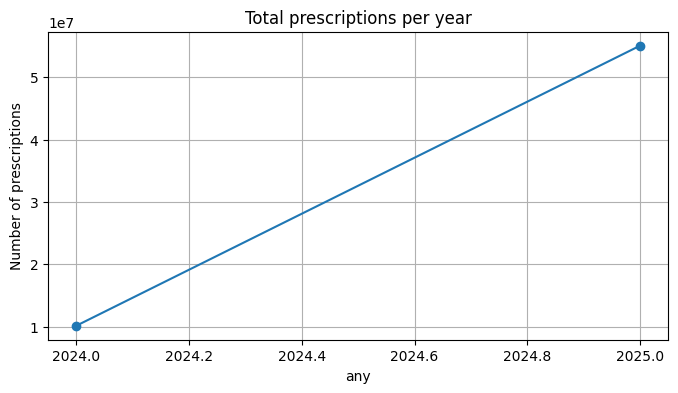

In [7]:
plt.figure(figsize=(8,4))
df.groupby("any")["nombre de receptes"].sum().plot(marker="o")
plt.title("Total prescriptions per year")
plt.ylabel("Number of prescriptions")
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(8,4))
df.groupby("any")["import íntegre"].sum().plot(marker="o")
plt.title("Total billed cost per year (€)")
plt.ylabel("Euros")
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(8,4))
df.groupby("mes")["nombre de receptes"].sum().plot(kind="bar")
plt.title("Seasonality: prescriptions per month")
plt.ylabel("Number of prescriptions")
plt.xlabel("Month")
plt.show()


In [ ]:
cost_region = (
    df.groupby("regió sanitària")["import íntegre"]
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
cost_region.plot(kind="bar")
plt.title("Total cost by health region")
plt.ylabel("Euros")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10,5))
df.groupby("regió sanitària")["nombre de receptes"].sum().sort_values().plot(kind="barh")
plt.title("Total prescriptions by region")
plt.xlabel("Number of prescriptions")
plt.show()


In [ ]:
plt.figure(figsize=(8,4))
df.groupby("grup d'edat")["nombre de receptes"].sum().plot(kind="bar")
plt.title("Prescriptions by age group")
plt.ylabel("Number of prescriptions")
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(8,4))
df.groupby("grup d'edat")["import íntegre"].sum().plot(kind="bar")
plt.title("Total cost by age group (€)")
plt.ylabel("Euros")
plt.xticks(rotation=45)
plt.show()


In [ ]:
atc1_cost = (
    df.groupby("grup ATC nivell 1")["import íntegre"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

plt.figure(figsize=(10,5))
atc1_cost.plot(kind="bar")
plt.title("Top ATC level 1 groups by cost")
plt.ylabel("Euros")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


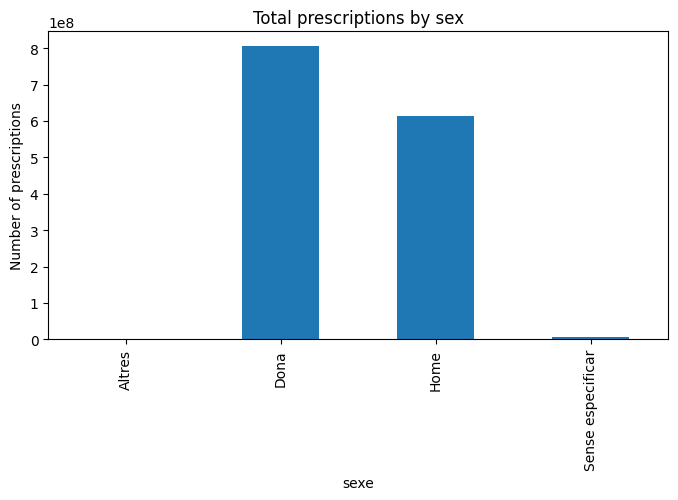

In [30]:
plt.figure(figsize=(8,4))
df.groupby("sexe")["nombre de receptes"].sum().plot(kind="bar")
plt.title("Total prescriptions by sex")
plt.ylabel("Number of prescriptions")
plt.show()


In [32]:
# Total prescriptions per region (normalization denominator)
total_rx_region = df.groupby("regió sanitària")["nombre de receptes"].sum()

# Prescriptions per region × ATC group
region_atc = (
    df.groupby(["regió sanitària", "grup ATC nivell 1"])["nombre de receptes"]
      .sum()
      .reset_index()
)

# Add percentage weight within each region
region_atc["percent_in_region"] = region_atc.apply(
    lambda row: row["nombre de receptes"] / total_rx_region[row["regió sanitària"]],
    axis=1
)


In [33]:
for region in region_atc["regió sanitària"].unique():
    print("\n=== Region:", region, "===")
    top = (region_atc[region_atc["regió sanitària"] == region]
           .sort_values("percent_in_region", ascending=False)
           .head(10))
    print(top[["grup ATC nivell 1", "percent_in_region"]])



=== Region: ALT PIRINEU i ARAN ===
                             grup ATC nivell 1  percent_in_region
10                            SISTEMA NERVIOSO           0.269603
7                       SISTEMA CARDIOVASCULAR           0.243739
13            TRACTO ALIMENTARIO Y METABOLISMO           0.140052
6             SANGRE Y ORGANOS HEMATOPOYETICOS           0.068811
11                        SISTEMA RESPIRATORIO           0.052989
9                   SISTEMA MUSCULOESQUELETICO           0.050067
1           ANTIINFECCIOSOS PARA USO SISTEMICO           0.034186
12                           Sense especificar           0.033246
3                      ORGANOS DE LOS SENTIDOS           0.032678
8   SISTEMA GENITOURINARIO Y HORMONAS SEXUALES           0.027567

=== Region: ALTRES ===
                     grup ATC nivell 1  percent_in_region
26                    SISTEMA NERVIOSO           0.237716
16  ANTIINFECCIOSOS PARA USO SISTEMICO           0.132518
25          SISTEMA MUSCULOESQUELETICO  

In [35]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


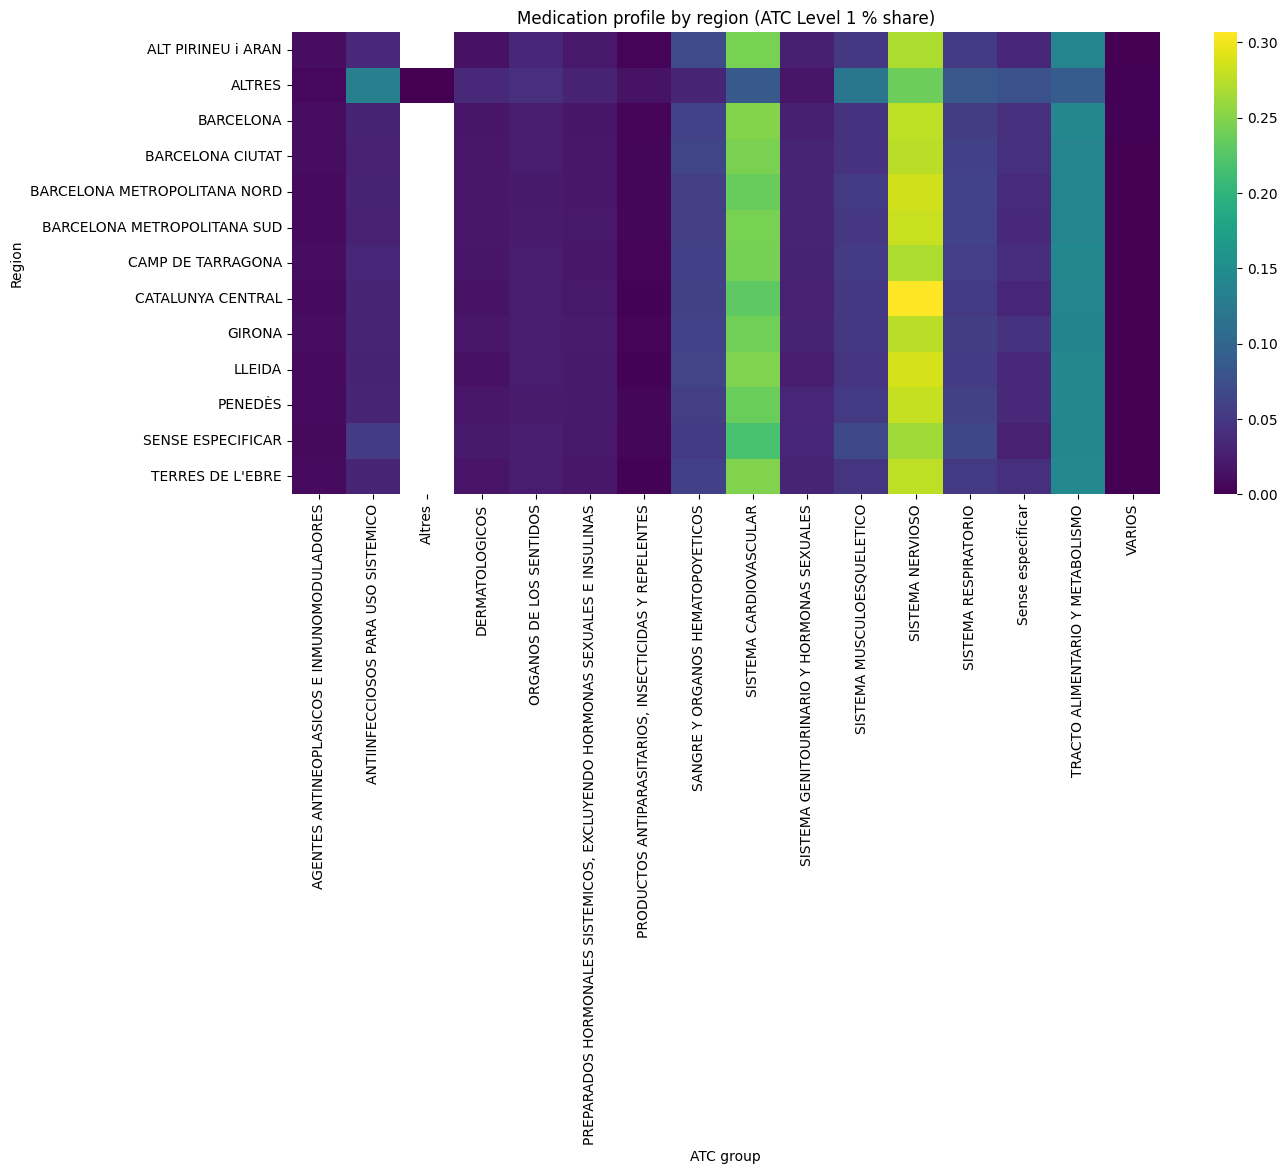

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

heat = region_atc.pivot_table(
    index="regió sanitària",
    columns="grup ATC nivell 1",
    values="percent_in_region"
)

plt.figure(figsize=(14,6))
sns.heatmap(heat, cmap="viridis", annot=False)
plt.title("Medication profile by region (ATC Level 1 % share)")
plt.ylabel("Region")
plt.xlabel("ATC group")
plt.show()


In [37]:
month_atc = (
    df.groupby(["mes", "grup ATC nivell 1"])["nombre de receptes"]
      .sum()
      .reset_index()
)


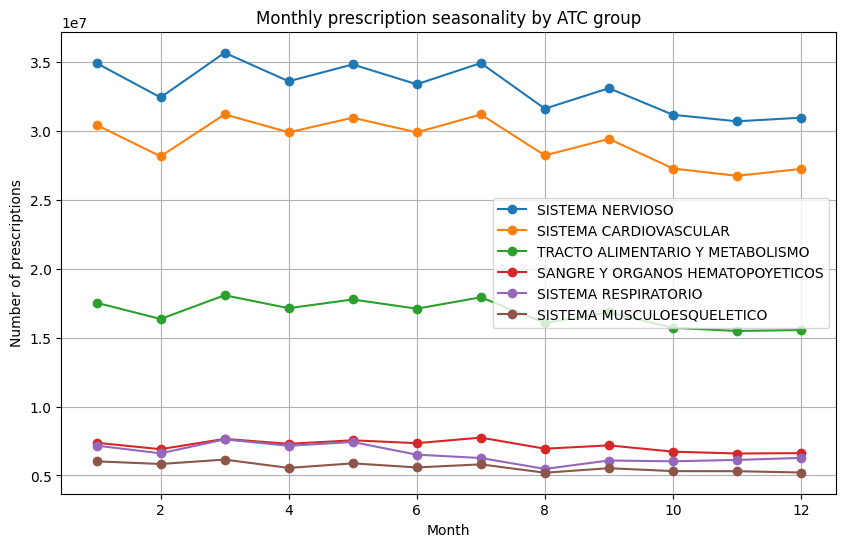

In [38]:
top_atc = (
    df.groupby("grup ATC nivell 1")["nombre de receptes"]
      .sum()
      .sort_values(ascending=False)
      .head(6)
      .index
)

plt.figure(figsize=(10,6))
for atc in top_atc:
    sub = month_atc[month_atc["grup ATC nivell 1"] == atc]
    plt.plot(sub["mes"], sub["nombre de receptes"], marker="o", label=atc)

plt.title("Monthly prescription seasonality by ATC group")
plt.xlabel("Month")
plt.ylabel("Number of prescriptions")
plt.legend()
plt.grid(True)
plt.show()


In [39]:
region_atc_matrix = region_atc.pivot_table(
    index="regió sanitària",
    columns="grup ATC nivell 1",
    values="percent_in_region",
    fill_value=0
)

corr = region_atc_matrix.T.corr()  # region×region correlation


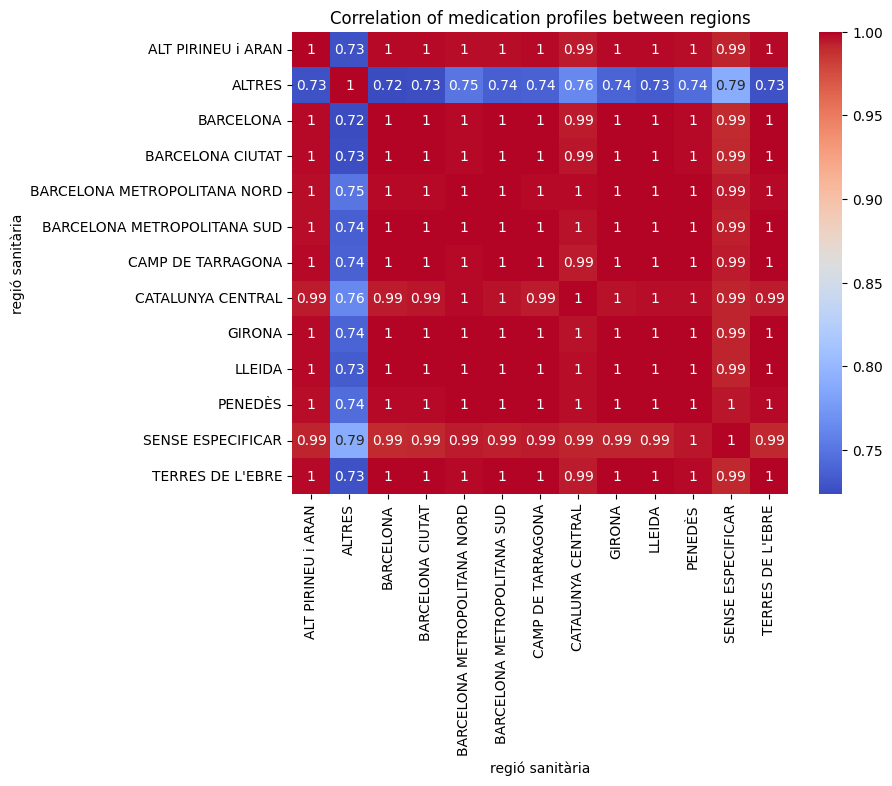

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation of medication profiles between regions")
plt.show()


✅ 1. Regions use the same categories of drugs at almost the exact same proportions.

No region is “special” in terms of ATC usage.

✅ 2. The medication burden is dominated by chronic diseases (cardiovascular, nervous system, diabetes).

✅ 3. Only respiratory drugs show clear seasonal variation.

✅ 4. Correlation matrix confirms: regional therapeutic patterns are nearly identical.
Possible causes:

Uniform healthcare practices

Similar population structure across regions

Universal coverage system prescribing the same guidelines

Aggregated ATC Level 1 categories are too coarse to reveal fine differences

## nervioso

In [43]:
df_nerv = df[df["grup ATC nivell 1"] == "SISTEMA NERVIOSO"].copy()
df_nerv.shape


(1393077, 19)

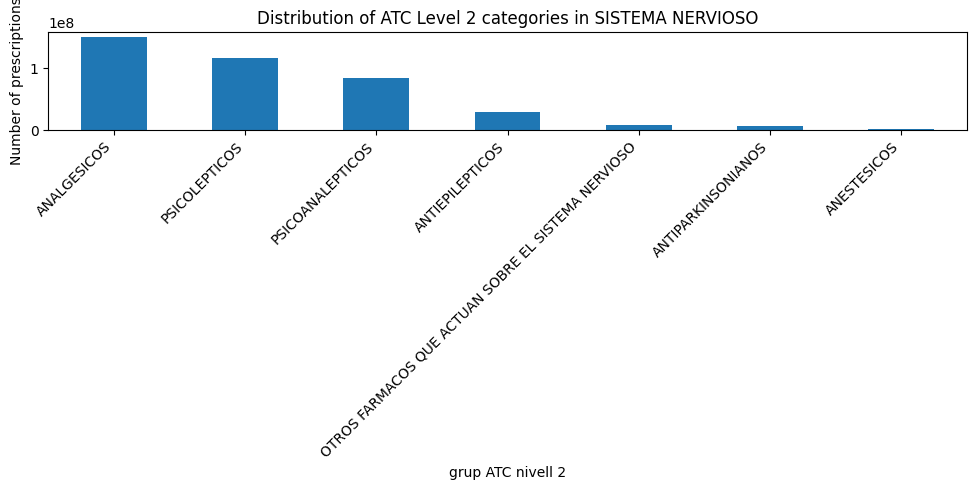

In [44]:
lvl2 = (
    df_nerv.groupby("grup ATC nivell 2")["nombre de receptes"]
           .sum()
           .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
lvl2.plot(kind="bar")
plt.title("Distribution of ATC Level 2 categories in SISTEMA NERVIOSO")
plt.ylabel("Number of prescriptions")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


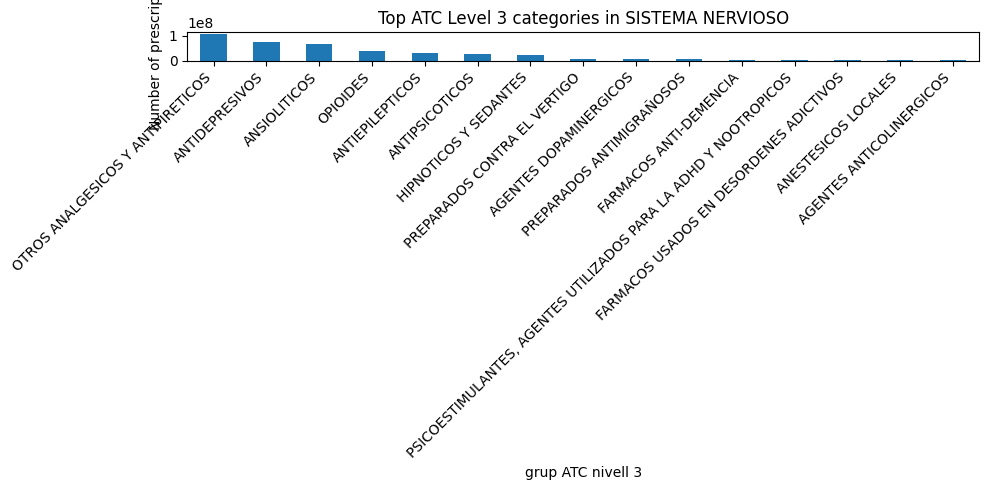

In [45]:
lvl3 = (
    df_nerv.groupby("grup ATC nivell 3")["nombre de receptes"]
           .sum()
           .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
lvl3.head(15).plot(kind="bar")
plt.title("Top ATC Level 3 categories in SISTEMA NERVIOSO")
plt.ylabel("Number of prescriptions")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


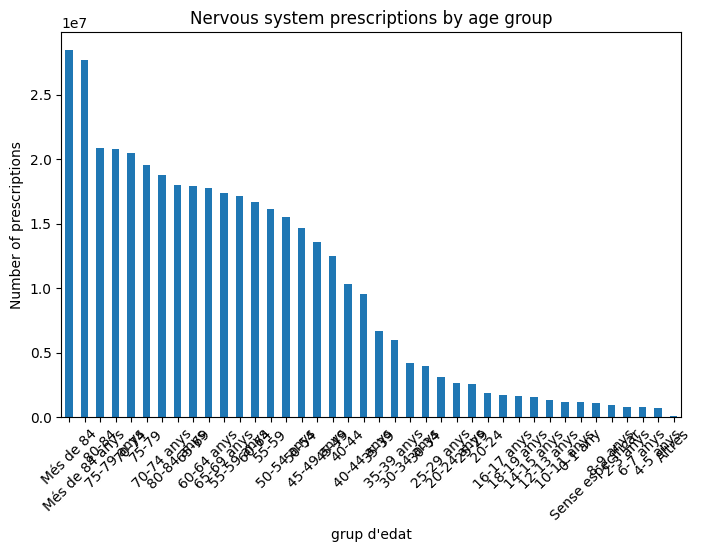

In [46]:
plt.figure(figsize=(8,5))
(
    df_nerv.groupby("grup d'edat")["nombre de receptes"]
           .sum()
           .sort_values(ascending=False)
           .plot(kind="bar")
)
plt.title("Nervous system prescriptions by age group")
plt.ylabel("Number of prescriptions")
plt.xticks(rotation=45)
plt.show()


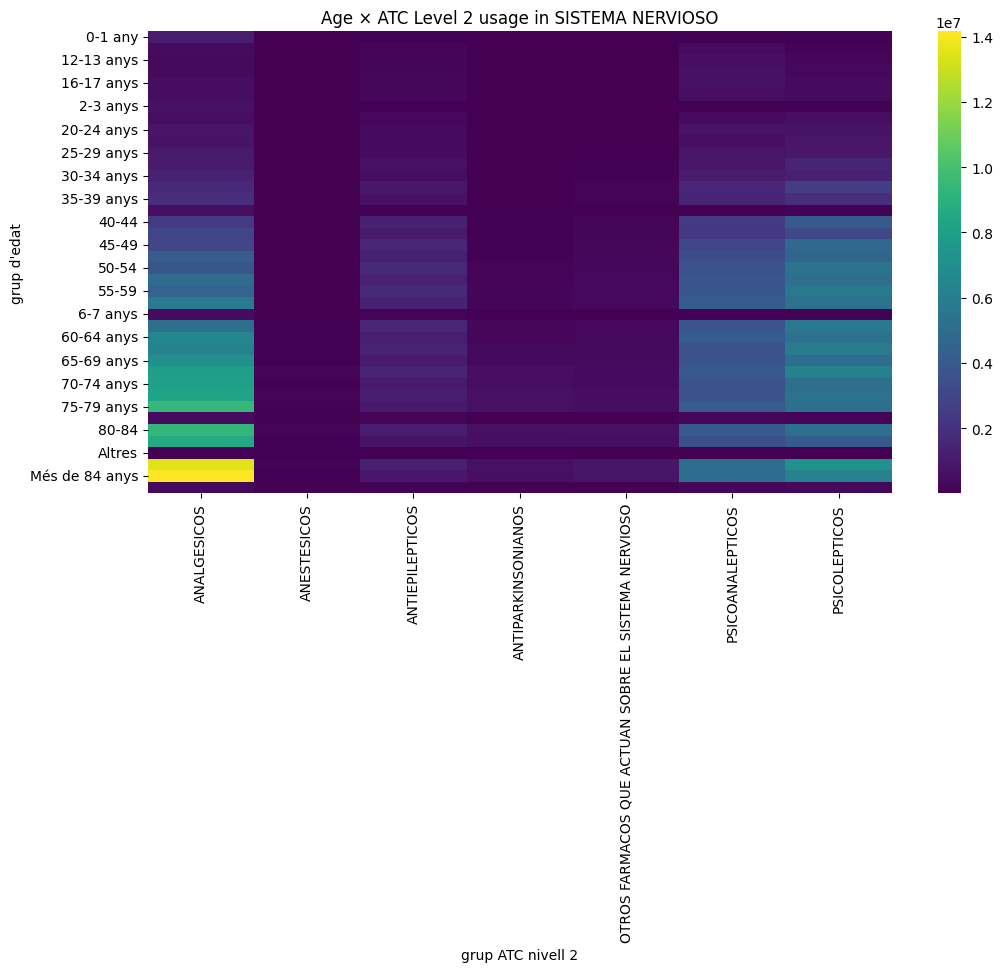

In [47]:
age_lvl2 = df_nerv.groupby(["grup d'edat", "grup ATC nivell 2"])["nombre de receptes"].sum()

heat_age_lvl2 = age_lvl2.unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heat_age_lvl2, cmap="viridis")
plt.title("Age × ATC Level 2 usage in SISTEMA NERVIOSO")
plt.show()


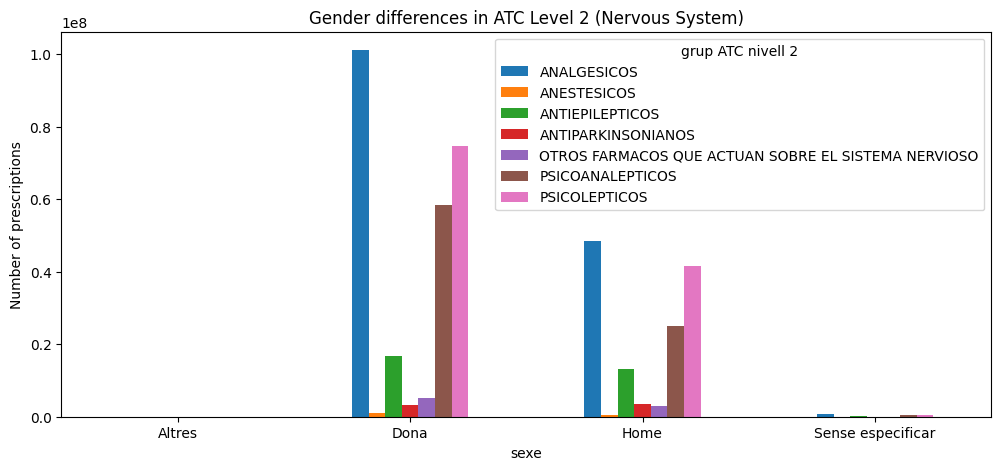

In [48]:
gender_lvl2 = (
    df_nerv.groupby(["sexe", "grup ATC nivell 2"])["nombre de receptes"]
           .sum()
           .unstack()
)

gender_lvl2.plot(kind="bar", figsize=(12,5))
plt.title("Gender differences in ATC Level 2 (Nervous System)")
plt.ylabel("Number of prescriptions")
plt.xticks(rotation=0)
plt.show()


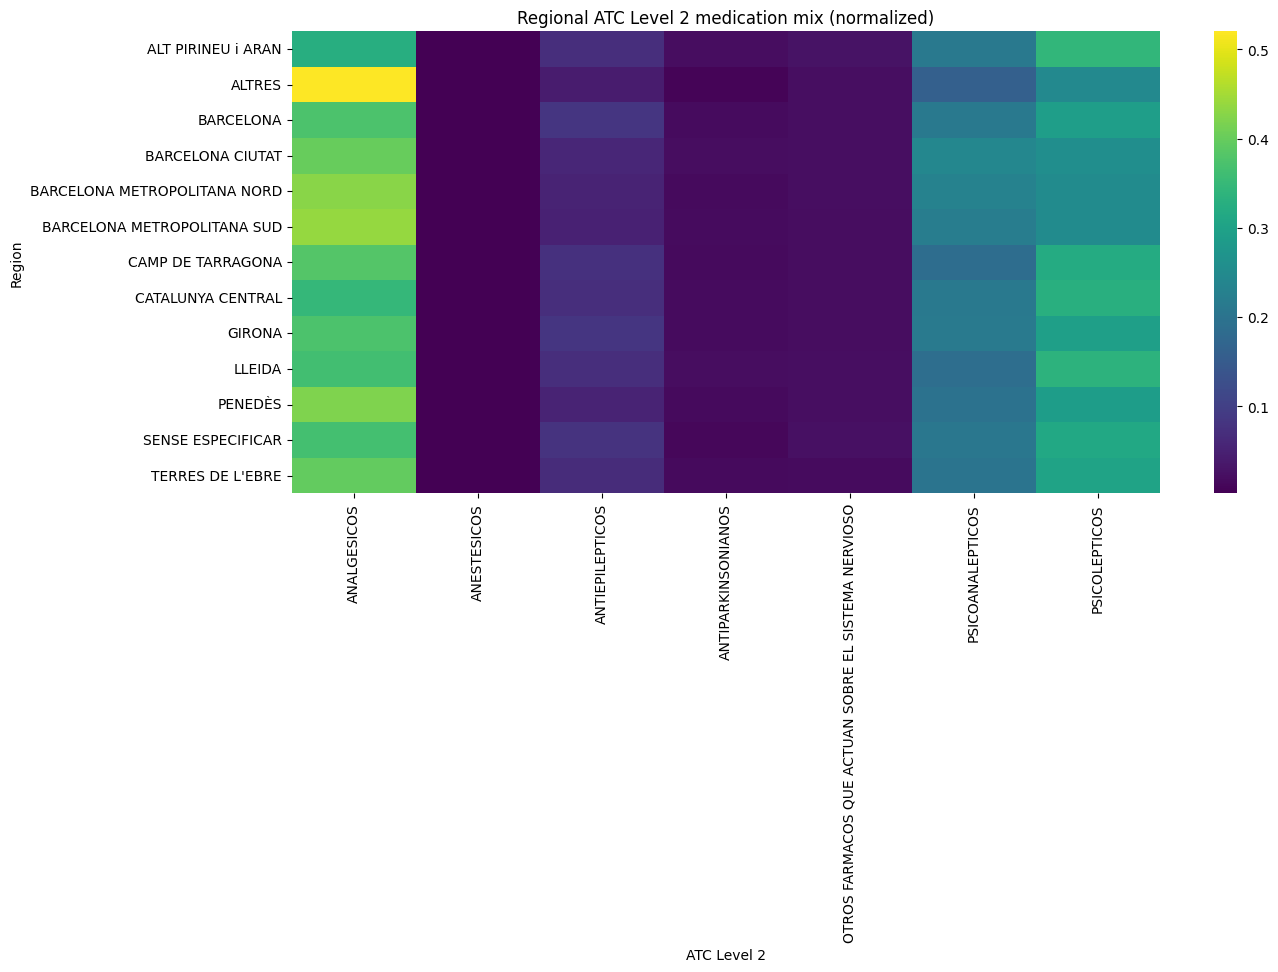

In [49]:
region_lvl2 = (
    df_nerv.groupby(["regió sanitària", "grup ATC nivell 2"])["nombre de receptes"]
           .sum()
           .unstack()
)

plt.figure(figsize=(14,6))
sns.heatmap(region_lvl2.div(region_lvl2.sum(axis=1), axis=0), cmap="viridis")
plt.title("Regional ATC Level 2 medication mix (normalized)")
plt.xlabel("ATC Level 2")
plt.ylabel("Region")
plt.show()


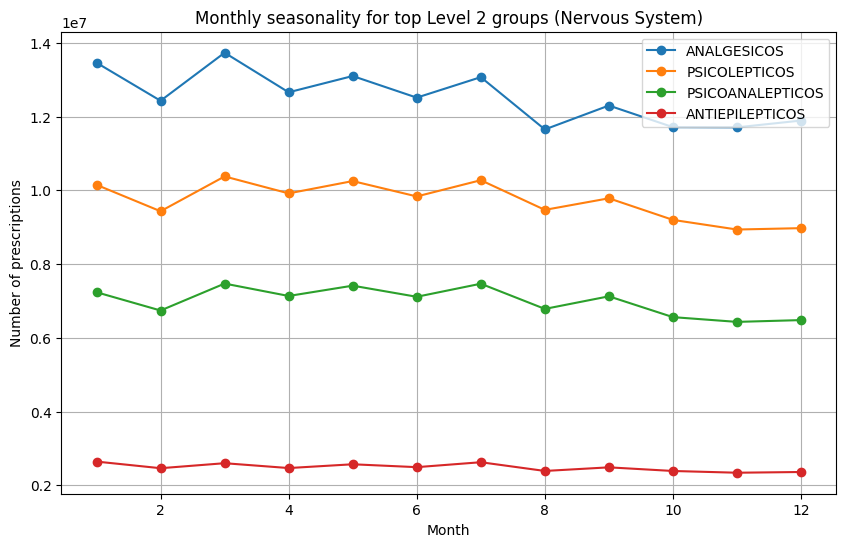

In [50]:
monthly_lvl2 = (
    df_nerv.groupby(["mes", "grup ATC nivell 2"])["nombre de receptes"]
           .sum()
           .reset_index()
)

plt.figure(figsize=(10,6))

top_lvl2 = lvl2.head(4).index  # top 4 Level 2 groups

for l2 in top_lvl2:
    sub = monthly_lvl2[monthly_lvl2["grup ATC nivell 2"] == l2]
    plt.plot(sub["mes"], sub["nombre de receptes"], marker="o", label=l2)

plt.title("Monthly seasonality for top Level 2 groups (Nervous System)")
plt.ylabel("Number of prescriptions")
plt.xlabel("Month")
plt.legend()
plt.grid(True)
plt.show()


In [51]:
# Convert age groups to numeric index
age_order = {age: i for i, age in enumerate(sorted(df["grup d'edat"].unique()))}
df_nerv["age_idx"] = df_nerv["grup d'edat"].map(age_order)

# Aggregate
age_dependence = (
    df_nerv.groupby(["age_idx", "grup ATC nivell 2"])["nombre de receptes"].sum()
            .unstack()
            .corrwith(pd.Series(age_order).sort_index())
)

age_dependence.sort_values(ascending=False).head(10)


grup ATC nivell 2
ANALGESICOS                                           NaN
ANESTESICOS                                           NaN
ANTIEPILEPTICOS                                       NaN
ANTIPARKINSONIANOS                                    NaN
OTROS FARMACOS QUE ACTUAN SOBRE EL SISTEMA NERVIOSO   NaN
PSICOANALEPTICOS                                      NaN
PSICOLEPTICOS                                         NaN
dtype: float64

Main conclusion:

There are major gender disparities in nervous-system medication use.

Observations:
Women (Dona):

Substantially higher use of:

Psychoanaleptics (N06) → antidepressants

Psycholeptics (N05) → anxiolytics, sedatives

Also somewhat higher in:

Analgesics (N02) → chronic pain medications

Gender is a major differentiator in nervous-system drug use, far stronger than:

Region

Month

Often stronger than age for some categories

This suggests:

Differences in disease prevalence

Differences in diagnosis rates

Differences in prescribing practices

Known global patterns in mental-health pharmacology